# SURPRISE HOUSING- PRICE PREDICTION

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
house.shape

(1168, 81)

In [6]:
test.shape

(292, 80)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
# Summary Statstics
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [11]:
#Combining trainig set and test sets for analysing data and finding patterns

train_temp = [house, test]
train_temp = pd.concat(train_temp)

In [12]:
train_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


### Data Cleaning

#### Removing/Imputing NaN values in Categorical attributes

In [13]:
# check for null values in all categorical columns

train_temp.select_dtypes(include='object').isnull().sum()[train_temp.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    train_temp[col]=train_temp[col].fillna('None')

#### Remove categorical attributes that have more than 85% data associated to one value
We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed
  to one value

In [15]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = train_temp.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(train_temp[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

train_temp.drop(columnsToBeRemoved, axis = 1, inplace = True)

train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,0,0,0,0,None,0,2,2007,Normal,128000.0
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,0,0,224,0,None,0,10,2007,Normal,268000.0
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,6,2007,Normal,269790.0
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,0,0,0,0,MnPrv,0,1,2010,Normal,190000.0
4,422,20,RL,NaN,16635,IR1,FR2,NWAmes,1Fam,1Story,...,0,0,0,0,None,0,6,2009,Normal,215000.0


In [16]:

# once again check for null values in all categorical columns

train_temp.select_dtypes(include='object').isnull().sum()[train_temp.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables

#### Removing null values in Numerical attributes

In [17]:
# check the null values in the numerical data

train_temp.select_dtypes(include=['int64','float']).isnull().sum()[train_temp.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice      292
dtype: int64

In [18]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

train_temp['LotFrontage'] = train_temp['LotFrontage'].replace(np.nan, train_temp['LotFrontage'].median())
train_temp['MasVnrArea'] = train_temp['MasVnrArea'].replace(np.nan, train_temp['MasVnrArea'].median())

In [19]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

train_temp['GarageYrBlt']=train_temp['GarageYrBlt'].fillna(0)
train_temp['GarageYrBlt'] = train_temp['GarageYrBlt'].astype(int)

In [20]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
train_temp['IsRemodelled'] = train_temp.apply(checkForRemodel, axis=1)
train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,127,120,RL,69.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,0,0,0,None,0,2,2007,Normal,128000.0,0
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,0,224,0,None,0,10,2007,Normal,268000.0,0
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,0,0,0,None,0,6,2007,Normal,269790.0,1
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,0,0,0,MnPrv,0,1,2010,Normal,190000.0,0
4,422,20,RL,69.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,0,0,0,None,0,6,2009,Normal,215000.0,1


In [21]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
train_temp['BuiltOrRemodelAge'] = train_temp.apply(getBuiltOrRemodelAge, axis=1)
train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,127,120,RL,69.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,0,0,None,0,2,2007,Normal,128000.0,0,31
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,224,0,None,0,10,2007,Normal,268000.0,0,37
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,0,0,None,0,6,2007,Normal,269790.0,1,10
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,0,0,MnPrv,0,1,2010,Normal,190000.0,0,33
4,422,20,RL,69.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,0,0,None,0,6,2009,Normal,215000.0,1,9


In [22]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
train_temp['OldOrNewGarage'] = train_temp['GarageYrBlt'].apply(getGarageConstructionPeriod)
train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,127,120,RL,69.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,0,None,0,2,2007,Normal,128000.0,0,31,0
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,0,None,0,10,2007,Normal,268000.0,0,37,0
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,0,None,0,6,2007,Normal,269790.0,1,10,0
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,0,MnPrv,0,1,2010,Normal,190000.0,0,33,0
4,422,20,RL,69.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,0,None,0,6,2009,Normal,215000.0,1,9,0


In [23]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

train_temp.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

### Remove numerical attributes that have more than 85% data associated to one value
We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed to one value

In [24]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = train_temp.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(train_temp[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
train_temp.drop(columnsToBeRemoved, axis = 1, inplace = True)

train_temp.drop(['MoSold'], axis = 1, inplace = True)

train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,127,120,RL,69.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,2,440,0,205,None,Normal,128000.0,0,31,0
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,2,621,81,207,None,Normal,268000.0,0,37,0
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,2,455,180,130,None,Normal,269790.0,1,10,0
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,2,546,0,122,MnPrv,Normal,190000.0,0,33,0
4,422,20,RL,69.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,2,529,240,0,None,Normal,215000.0,1,9,0


In [25]:
# check for percentage of null values in each column

percent_missing = round(100*(train_temp.isnull().sum()/len(train_temp.index)), 2)
print(percent_missing)

Id                    0.0
MSSubClass            0.0
MSZoning              0.0
LotFrontage           0.0
LotArea               0.0
LotShape              0.0
LotConfig             0.0
Neighborhood          0.0
BldgType              0.0
HouseStyle            0.0
OverallQual           0.0
OverallCond           0.0
RoofStyle             0.0
Exterior1st           0.0
Exterior2nd           0.0
MasVnrType            0.0
MasVnrArea            0.0
ExterQual             0.0
Foundation            0.0
BsmtQual              0.0
BsmtExposure          0.0
BsmtFinType1          0.0
BsmtFinSF1            0.0
BsmtUnfSF             0.0
TotalBsmtSF           0.0
HeatingQC             0.0
1stFlrSF              0.0
2ndFlrSF              0.0
GrLivArea             0.0
BsmtFullBath          0.0
FullBath              0.0
HalfBath              0.0
BedroomAbvGr          0.0
KitchenQual           0.0
TotRmsAbvGrd          0.0
Fireplaces            0.0
FireplaceQu           0.0
GarageType            0.0
GarageFinish

#### Check for Duplicates

In [26]:
# Check if there are any duplicate values in the dataset

train_temp[train_temp.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


No duplicate entries found

#### Outlier Treatment

In [27]:
# Checking outliers at 25%,50%,75%,90%,95% and above

train_temp.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,181477.005993,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79105.586863,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,130375.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163995.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,215000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,277650.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,325000.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,443943.500000,1.000000,60.000000,1.000000


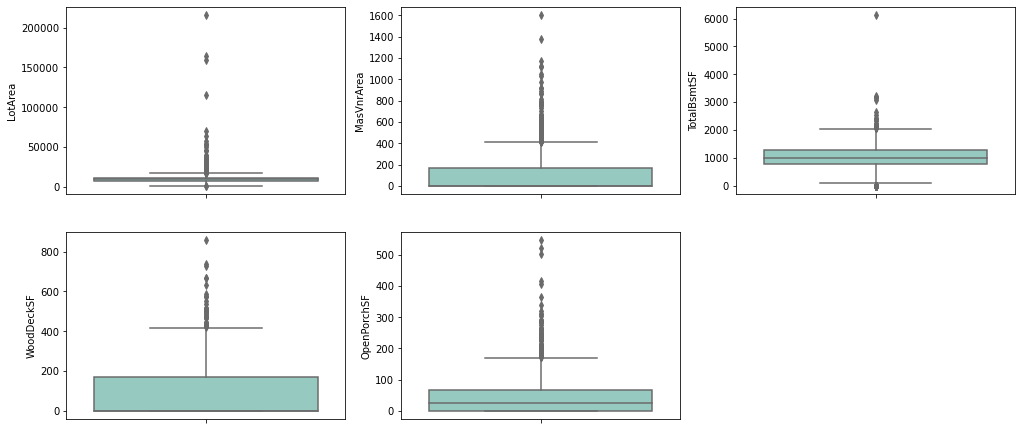

In [28]:

# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = train_temp)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = train_temp)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = train_temp)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = train_temp)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = train_temp)
plt.show()

In [29]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = train_temp['LotArea'].quantile(0.98)
train_temp = train_temp[train_temp["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = train_temp['MasVnrArea'].quantile(0.98)
train_temp = train_temp[train_temp["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = train_temp['TotalBsmtSF'].quantile(0.99)
train_temp = train_temp[train_temp["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = train_temp['WoodDeckSF'].quantile(0.99)
train_temp = train_temp[train_temp["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = train_temp['OpenPorchSF'].quantile(0.99)
train_temp = train_temp[train_temp["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [30]:
# Determine the percentage of data retained

num_data = round(100*(len(train_temp)/1460),2)
print(num_data)

93.01


### Data Visualization

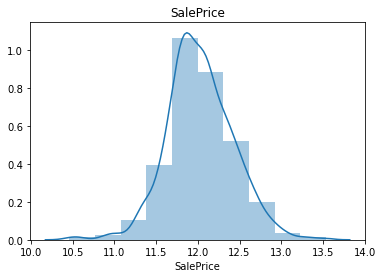

In [31]:
# Visualise the target variable -> SalePrice after transforming the sales price

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise

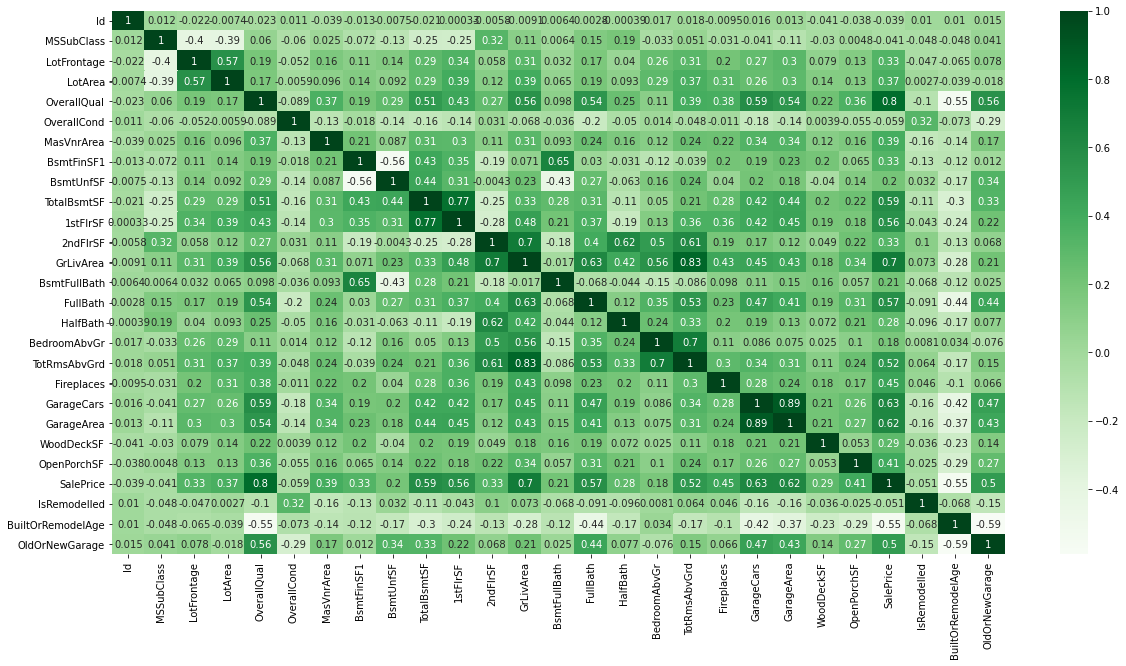

In [32]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(train_temp.corr(), annot = True, cmap="Greens")
plt.show()

##### Removing following columns which shows high correlation
TotRmsAbvGrd and GrLivArea show 82%

Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [33]:
# Removing the highly correlated variables

train_temp.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [34]:
# Check the shape of the dataframe

train_temp.shape

(1358, 47)

### Data Preparation

In [35]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

train_temp['d_LotShape'] = train_temp['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
train_temp['d_ExterQual'] = train_temp['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
train_temp['d_BsmtQual'] = train_temp['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
train_temp['d_BsmtExposure'] = train_temp['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
train_temp['d_BsmtFinType1'] = train_temp['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
train_temp['d_HeatingQC'] = train_temp['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
train_temp['d_KitchenQual'] = train_temp['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
train_temp['d_FireplaceQu'] = train_temp['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
train_temp['d_GarageFinish'] = train_temp['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
train_temp['d_BldgType'] = train_temp['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
train_temp['d_HouseStyle'] = train_temp['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
train_temp['d_Fence'] = train_temp['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
train_temp['d_LotConfig'] = train_temp['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
train_temp['d_MasVnrType'] = train_temp['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
train_temp['d_SaleCondition'] = train_temp['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
train_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,127,120,RL,69.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,3,3,3,2,4,1,0,5,0,1
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,5,3,3,1,1,4,0,3,0,1
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,5,3,3,2,1,1,2,5,1,1
4,422,20,RL,69.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,4,4,3,3,1,1,0,2,1,1
5,1197,60,RL,58.0,14054,IR1,Inside,Gilbert,1Fam,2Story,...,5,4,4,3,1,4,0,5,0,1


In [36]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

train_temp = train_temp.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

train_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,120,RL,69.0,4928,NPkVill,6,5,Gable,Plywood,Plywood,...,3,3,3,2,4,1,0,5,0,1
2,60,RL,92.0,9920,NoRidge,7,5,Gable,MetalSd,MetalSd,...,5,3,3,1,1,4,0,3,0,1
3,20,RL,105.0,11751,NWAmes,6,6,Hip,Plywood,Plywood,...,5,3,3,2,1,1,2,5,1,1
4,20,RL,69.0,16635,NWAmes,6,7,Gable,CemntBd,CmentBd,...,4,4,3,3,1,1,0,2,1,1
5,60,RL,58.0,14054,Gilbert,7,5,Gable,VinylSd,VinylSd,...,5,4,4,3,1,4,0,5,0,1


In [37]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(train_temp['MSZoning'], prefix='MSZoning', drop_first = True)
train_temp = pd.concat([train_temp, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(train_temp['Neighborhood'], prefix='Neighborhood', drop_first = True)
train_temp = pd.concat([train_temp, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(train_temp['RoofStyle'], prefix='RoofStyle', drop_first = True)
train_temp = pd.concat([train_temp, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(train_temp['Exterior1st'], prefix='Exterior1st', drop_first = True)
train_temp = pd.concat([train_temp, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(train_temp['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
train_temp = pd.concat([train_temp, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(train_temp['Foundation'], prefix='Foundation', drop_first = True)
train_temp = pd.concat([train_temp, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(train_temp['GarageType'], prefix='GarageType', drop_first = True)
train_temp = pd.concat([train_temp, d_GarageType], axis = 1)

train_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,120,RL,69.0,4928,NPkVill,6,5,Gable,Plywood,Plywood,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,92.0,9920,NoRidge,7,5,Gable,MetalSd,MetalSd,...,1,0,0,0,1,0,0,0,0,0
3,20,RL,105.0,11751,NWAmes,6,6,Hip,Plywood,Plywood,...,0,0,0,0,1,0,0,0,0,0
4,20,RL,69.0,16635,NWAmes,6,7,Gable,CemntBd,CmentBd,...,0,0,0,0,1,0,0,0,0,0
5,60,RL,58.0,14054,Gilbert,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,0,0,1,0,0,0


In [38]:
# drop the below columns as we now have new columns derived from these columns

train_temp = train_temp.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

train_temp.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,120,69.0,4928,6,5,0.0,120,958,1078,958,...,0,0,0,0,1,0,0,0,0,0
2,60,92.0,9920,7,5,0.0,862,255,1117,1127,...,1,0,0,0,1,0,0,0,0,0
3,20,105.0,11751,6,6,480.0,705,1139,1844,1844,...,0,0,0,0,1,0,0,0,0,0
4,20,69.0,16635,6,7,126.0,1246,356,1602,1602,...,0,0,0,0,1,0,0,0,0,0
5,60,58.0,14054,7,5,0.0,0,879,879,879,...,1,0,0,0,0,0,1,0,0,0


In [39]:
train_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 291
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All columns in the data set are now numeric

In [40]:
train_temp.shape

(1358, 112)

In [41]:
train_temp['SalePrice']

0      128000.0
2      269790.0
3      190000.0
4      215000.0
5      219210.0
         ...   
287         NaN
288         NaN
289         NaN
290         NaN
291         NaN
Name: SalePrice, Length: 1358, dtype: float64

In [42]:
train_temp['SalePrice'].isnull().sum()

271

In [43]:
new_test = train_temp.tail(271)

In [44]:
new_test.shape

(271, 112)

In [45]:
new_train = train_temp.head(1087)
new_train.shape

(1087, 112)

In [46]:
new_train['SalePrice'].isnull().sum()

0

### Train Test Split

In [47]:
# Putting all feature variable to X

X = new_train
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,120,69.0,4928,6,5,0.0,120,958,1078,958,...,0,0,0,0,1,0,0,0,0,0
2,60,92.0,9920,7,5,0.0,862,255,1117,1127,...,1,0,0,0,1,0,0,0,0,0
3,20,105.0,11751,6,6,480.0,705,1139,1844,1844,...,0,0,0,0,1,0,0,0,0,0
4,20,69.0,16635,6,7,126.0,1246,356,1602,1602,...,0,0,0,0,1,0,0,0,0,0
5,60,58.0,14054,7,5,0.0,0,879,879,879,...,1,0,0,0,0,0,1,0,0,0


In [48]:
y = new_train['SalePrice']
y

0       128000.0
2       269790.0
3       190000.0
4       215000.0
5       219210.0
          ...   
1163    122000.0
1164    108000.0
1165    148500.0
1166     40000.0
1167    183200.0
Name: SalePrice, Length: 1087, dtype: float64

#### Feature Scaling

In [49]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [50]:
# split into train and test

from sklearn.model_selection import train_test_split

# np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Model Training

In [51]:
# Importing the model library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing all Boosting models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Import Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [52]:
model = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(X_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(X_train, y_train)))
    predm = m.predict(X_test)
    print('R2 Score: ',round(r2_score(y_test, predm)*100,2))
    print('MAE: %s' % (mean_absolute_error(y_test, predm)))
    print('MSE : ', mean_squared_error(y_test, predm))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, predm)))


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is 1.0
R2 Score:  100.0
MAE: 1.0052836850422238e-10
MSE :  2.1059907093010015e-20
RMSE :  1.4512031936641407e-10

*************** SVR() Model ***************

Score of SVR() Model is -0.04273027687108444
R2 Score:  -5.06
MAE: 49983.633844233664
MSE :  4776390126.370114
RMSE :  69111.43267484847

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is 1.0
R2 Score:  99.49
MAE: 1083.14373088685
MSE :  23191623.8470948
RMSE :  4815.768250974584

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is 0.8366321336650707
R2 Score:  71.67
MAE: 22989.60917431193
MSE :  1288141971.6453824
RMSE :  35890.694777969715

*************** Lasso() Model ***************

Score of Lasso() Model is 0.9999997708040431
R2 Score:  100.0
MAE: 10.236678829916515
MSE :  328.6341555614946
RMSE :  18.12826951370413

************

In [53]:
# Cross_val_score

model = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, X, y, cv=5, scoring = 'r2')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is [1.         1.         1.         1.         0.99949876]
Mean score:  0.9998997523231969
Std score :  0.0002004953536062892
Min score :  0.9994987616159843
Max score :  1.0

*************** SVR() Model ***************

Score of SVR() Model is [-0.03147205 -0.12279179 -0.02761568 -0.07005054 -0.00900443]
Mean score:  -0.05218689393134137
Std score :  0.04050119901711761
Min score :  -0.12279178504573607
Max score :  -0.009004425056480914

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is [0.98720586 0.98330194 0.99940511 0.99929283 0.99930997]
Mean score:  0.9937031417746394
Std score :  0.007008471851655648
Min score :  0.9833019364564716
Max score :  0.9994051146670755

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is [0.6783541  0.72791393 0.7247401  0.75643368 0.73139707]
Mean score:

#### Lasso() & Ridge() Model gives the best score and r2 score. So choosing it as Final Model

#### using GridSearchCV to find the best parameters

#### Ridge

In [54]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.0001}
-0.0320761706403956


In [56]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007418,9.949865e-04,0.003708,9.559564e-04,0.0001,{'alpha': 0.0001},-0.033072,-0.036839,-0.032867,-0.029435,...,-0.032076,0.003051,1,-0.025855,-0.028221,-0.026228,-0.025837,-0.024466,-0.026122,0.001209
1,0.006442,7.812865e-04,0.003709,3.901501e-04,0.001,{'alpha': 0.001},-0.330706,-0.368377,-0.328657,-0.294340,...,-0.320750,0.030511,2,-0.258544,-0.282202,-0.262275,-0.258365,-0.244658,-0.261209,0.012091
2,0.008004,1.991038e-03,0.004294,4.775815e-04,0.01,{'alpha': 0.01},-3.305825,-3.682370,-3.285421,-2.942482,...,-3.206386,0.304917,3,-2.584781,-2.821163,-2.622032,-2.582937,-2.445956,-2.611374,0.120834
3,0.006637,3.906016e-04,0.003903,5.091228e-07,0.1,{'alpha': 0.1},-32.949052,-36.688577,-32.742259,-29.334954,...,-31.957145,3.032017,4,-25.782810,-28.127457,-26.149707,-25.758966,-24.397809,-26.043350,1.200948
4,0.007223,7.810714e-04,0.004293,4.782411e-04,0.2,{'alpha': 0.2},-65.667647,-73.093284,-65.245883,-58.476719,...,-63.687810,6.029165,5,-51.423579,-56.074732,-52.145981,-51.365919,-48.662058,-51.934454,2.386606
5,0.006832,6.177834e-04,0.003904,5.519789e-07,0.3,{'alpha': 0.3},-98.168382,-109.233907,-97.524483,-87.450914,...,-95.210274,8.989647,6,-76.925393,-83.852073,-77.993271,-76.826706,-72.798001,-77.679089,3.558766
6,0.006832,8.734113e-04,0.004490,4.779301e-04,0.4,{'alpha': 0.4},-130.460389,-145.124530,-129.589051,-116.296745,...,-126.539791,11.911551,7,-102.290795,-111.482691,-103.695040,-102.146018,-96.809223,-103.284754,4.724228
7,0.006832,7.294206e-07,0.003513,9.956591e-04,0.5,{'alpha': 0.5},-162.550722,-180.775707,-161.448618,-144.994840,...,-157.678945,14.801017,8,-127.522485,-138.962625,-129.255579,-127.327989,-120.699267,-128.753589,5.880416
8,0.006833,1.458841e-06,0.003903,1.651812e-06,0.6,{'alpha': 0.6},-194.445097,-216.195699,-193.110728,-173.547332,...,-188.633433,17.659793,9,-152.622544,-166.293101,-154.677066,-152.375614,-144.472903,-154.088246,7.026256
9,0.007223,4.785137e-04,0.004099,3.895762e-04,0.7,{'alpha': 0.7},-226.148331,-251.391216,-224.581772,-201.956107,...,-219.408050,20.489227,10,-177.592595,-193.476173,-179.966092,-177.292553,-168.130973,-179.291677,8.162101


In [57]:
# check the coefficient values with lambda = 10

alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.10033538e-03,  2.82958161e-03,  8.92732275e-03,  1.61736573e-02,
        6.05857778e-03,  1.36551749e-03,  2.63922504e-03, -4.28212977e-03,
        1.44887501e-02, -6.41147255e-03, -7.81334395e-03,  3.73298481e-02,
        2.31665385e-03,  4.12389565e-03,  4.78176512e-03, -4.17094440e-03,
        2.48459738e-03,  7.71485378e-03,  2.83872448e-03,  2.32066909e-03,
        6.73185315e+04,  4.11748983e-04, -2.78905034e-03,  5.19825995e-03,
        1.45580823e-03,  6.53498015e-03,  5.98946050e-03,  8.11955884e-03,
        2.72620618e-03,  3.56730717e-05,  6.78275278e-03, -4.24409359e-04,
        3.81361682e-03, -8.50128606e-03, -1.65820859e-03, -1.33666580e-03,
        5.77018809e-05,  1.11531776e-03,  1.96164286e-03,  1.30434076e-02,
        7.24653268e-03,  1.92901374e-02,  1.33157021e-02,  1.63253495e-03,
        3.21874897e-03,  1.77512429e-03, -9.87840320e-04, -4.61313277e-03,
        3.61989686e-03, -4.21035108e-03, -4.67371979e-03, -6.60162767e-04,
        5.23543453e-04, -

In [58]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.0013093798165369334

In [59]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9999999999998052

#### Lasso

In [60]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [61]:
#checking the value of optimum number of parameters
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 3.0}
0.9999999965894452


In [62]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016787,0.000956,0.004684,7.290727e-04,0.0001,{'alpha': 0.0001},0.999998,0.999993,0.999998,0.999998,...,0.999997,1.883362e-06,25,0.999999,0.999997,0.999998,0.999999,0.999999,0.999999,5.748267e-07
1,0.015031,0.002277,0.003904,6.174818e-04,0.001,{'alpha': 0.001},0.999998,0.999993,0.999998,0.999998,...,0.999997,1.884014e-06,24,0.999999,0.999997,0.999998,0.999999,0.999999,0.999999,5.747870e-07
2,0.015615,0.002226,0.004491,4.792569e-04,0.01,{'alpha': 0.01},0.999998,0.999993,0.999998,0.999998,...,0.999997,1.895788e-06,23,0.999999,0.999997,0.999998,0.999999,0.999999,0.999999,5.777638e-07
3,0.012688,0.001852,0.003709,7.302701e-04,0.1,{'alpha': 0.1},0.999998,0.999993,0.999999,0.999999,...,0.999997,1.949816e-06,22,0.999999,0.999998,0.999999,0.999999,0.999999,0.999999,5.785564e-07
4,0.014445,0.001138,0.003709,3.908162e-04,0.2,{'alpha': 0.2},0.999998,0.999994,0.999999,0.999999,...,0.999997,1.882663e-06,21,0.999999,0.999998,0.999999,0.999999,0.999999,0.999999,4.959787e-07
5,0.013469,0.000730,0.004685,7.308180e-04,0.3,{'alpha': 0.3},0.999999,0.999996,0.999999,0.999999,...,0.999998,1.112991e-06,19,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,1.489503e-07
6,0.015811,0.001138,0.004099,3.909589e-04,0.4,{'alpha': 0.4},0.999999,0.999997,1.000000,0.999999,...,0.999999,1.054327e-06,18,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,1.258325e-07
7,0.013078,0.001702,0.003904,6.843901e-07,0.5,{'alpha': 0.5},0.999999,0.999997,1.000000,1.000000,...,0.999999,9.696413e-07,17,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,1.105606e-07
8,0.014835,0.001789,0.004294,4.778718e-04,0.6,{'alpha': 0.6},0.999999,0.999997,1.000000,1.000000,...,0.999999,8.783770e-07,16,1.000000,0.999999,0.999999,1.000000,1.000000,0.999999,9.386588e-08
9,0.014445,0.001138,0.004295,4.780461e-04,0.7,{'alpha': 0.7},0.999999,0.999998,1.000000,1.000000,...,0.999999,8.223183e-07,15,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,8.964159e-08


In [63]:
# check the coefficient values with lambda = 0.0004

alpha = 3.0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.77176691e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.63783806e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.73124021e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [64]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

32.10219506214901

In [65]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9999999928821287